<h1><center>SEIS 763 Machine Learning<br>Team 4 Project - Max Features<br>Wess Kilker&emsp;Tianyu Lei&emsp;Jason Xiao &emsp;Jessica Zastoupil</center></h1>

### Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#use the encoding as latin1 to read this file as there are some special characters in the file
df = pd.read_csv('SeoulBikeData.csv',encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Column / Feature Updates

In [2]:
#filter out non functioning days
df = df.loc[df['Functioning Day'] == 'Yes']

#Add Weekday Column
df['DayOfWeek'] = pd.to_datetime(df['Date']).apply(lambda x: x.weekday())

#move rented bike count to end and remove unneeded features: Date and Functioning Day
df = df[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday','DayOfWeek', 'Rented Bike Count']]


### Exploring Data
#### Data Preview

In [ ]:
cols = list(df.columns.values)
print(cols)
print()
print('Shape of dataframe after column data prep: \n' + str(df.shape))

df.head()

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'DayOfWeek', 'Rented Bike Count']

Shape of dataframe after column data prep: 
(8465, 13)


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,DayOfWeek,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,3,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,3,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,3,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,3,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,3,78


#### Histograms

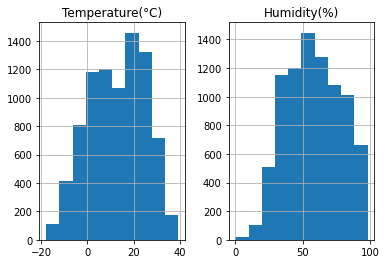

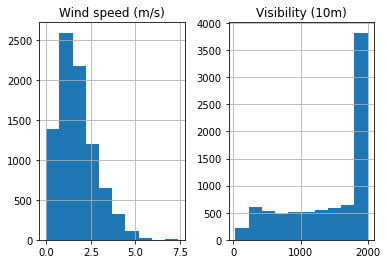

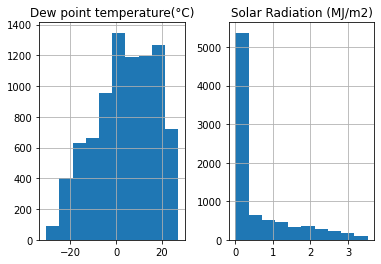

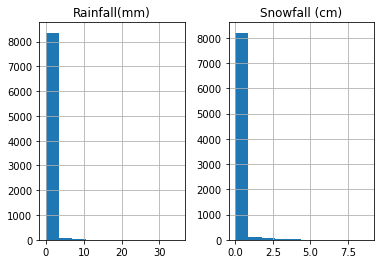

In [ ]:
df.hist(['Temperature(°C)','Humidity(%)'])
df.hist(['Wind speed (m/s)','Visibility (10m)'])
df.hist(['Dew point temperature(°C)','Solar Radiation (MJ/m2)'])
df.hist(['Rainfall(mm)','Snowfall (cm)'])
plt.show()

#### Average Bikes Rented for Non-Holiday Days by Season and Day of the Week

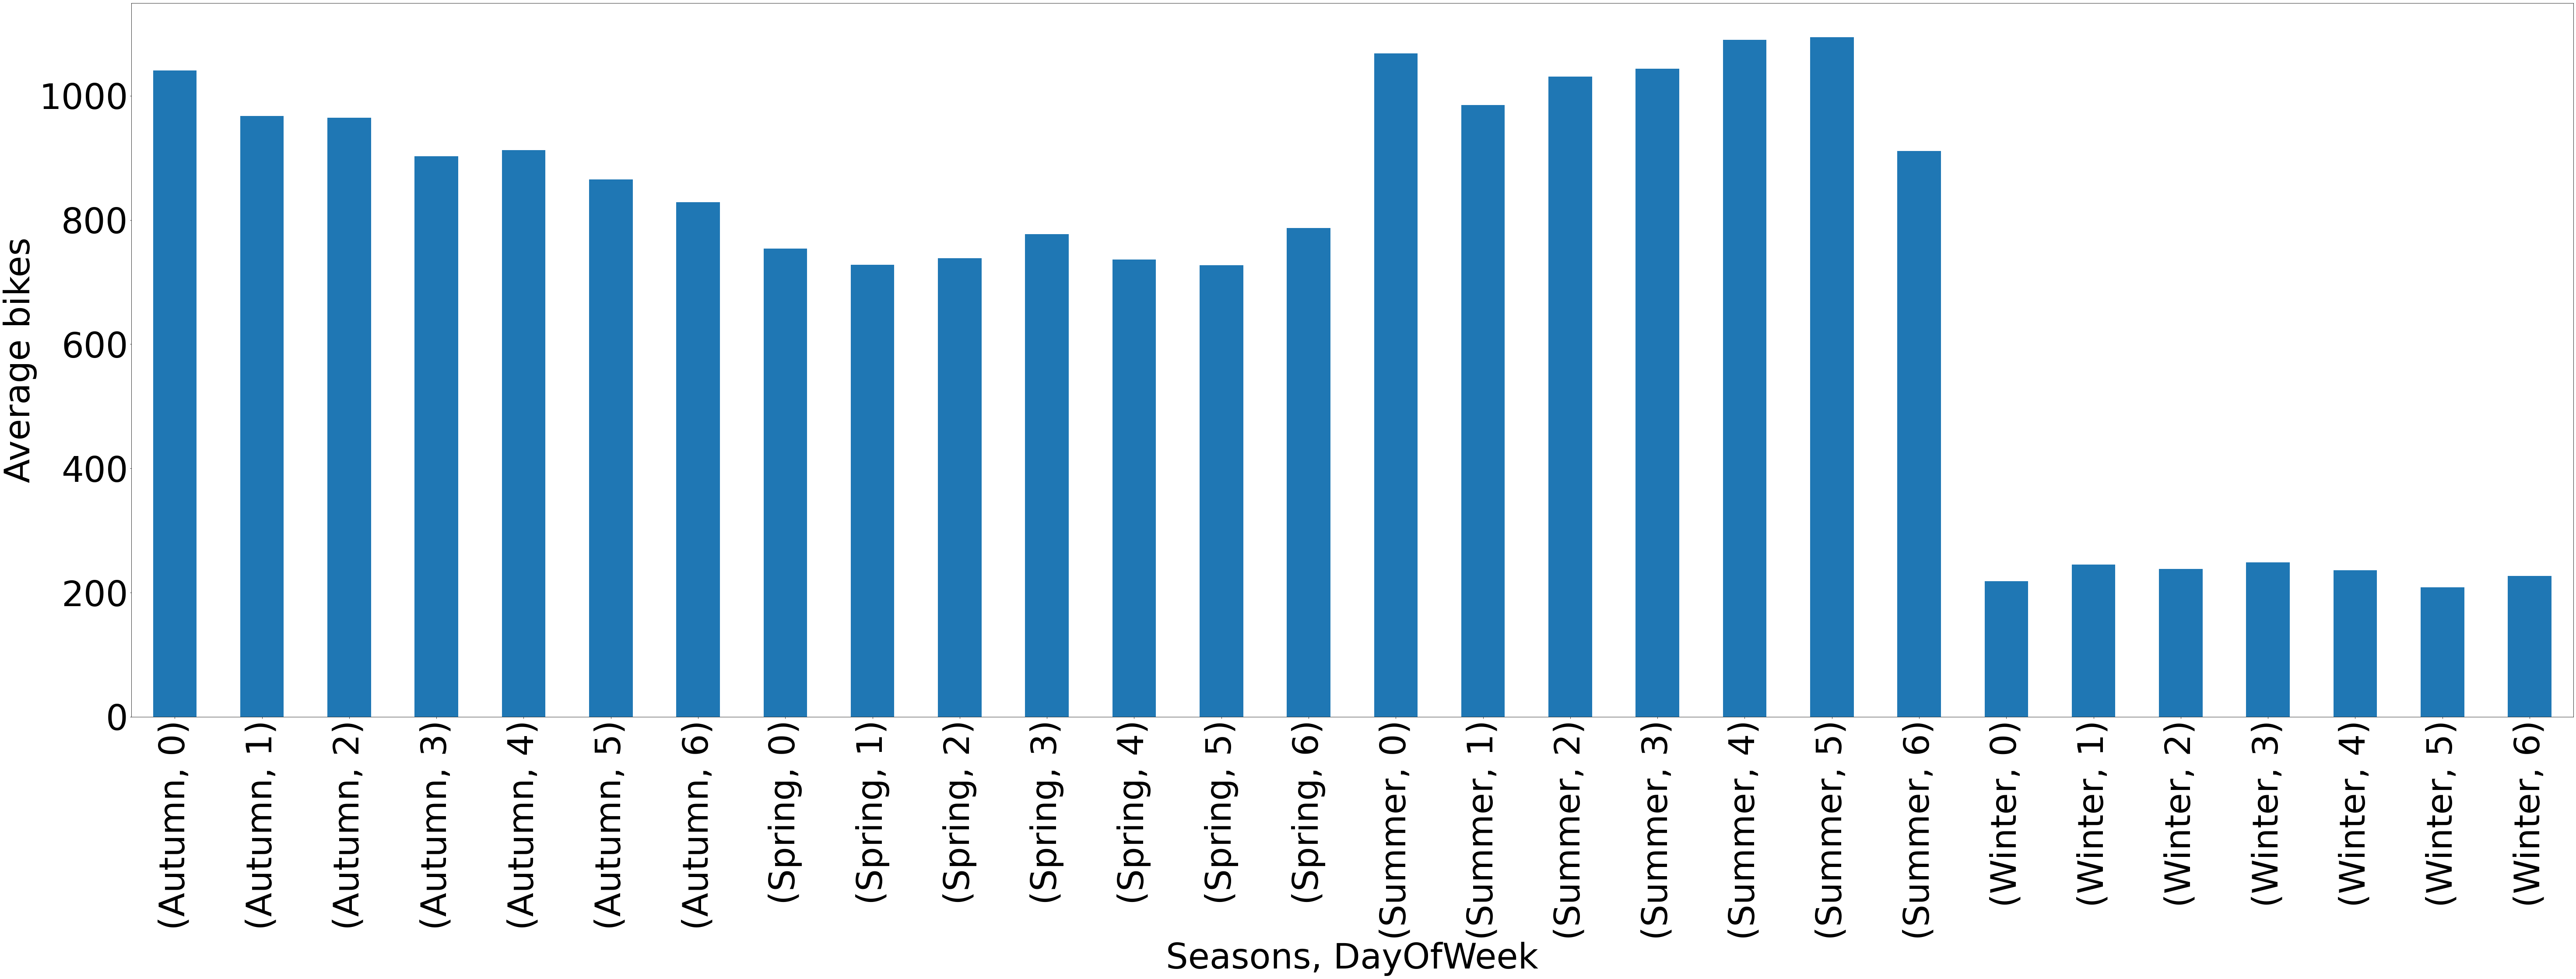

In [ ]:
#Looking at non-holidays only by Seasons and Day of the week
tdf = df.loc[df['Holiday'] == 'No Holiday']
ax = tdf.groupby(['Seasons', 'DayOfWeek'])['Rented Bike Count'].mean().plot(kind = "bar",figsize=(100,30), fontsize=50)
ax.set_xlabel('Seasons, DayOfWeek', size = 80)
ax.set_ylabel('Average bikes', size = 80)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(80)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(80)

#### Average Bikes Rented by Season, Holiday and Day of the Week

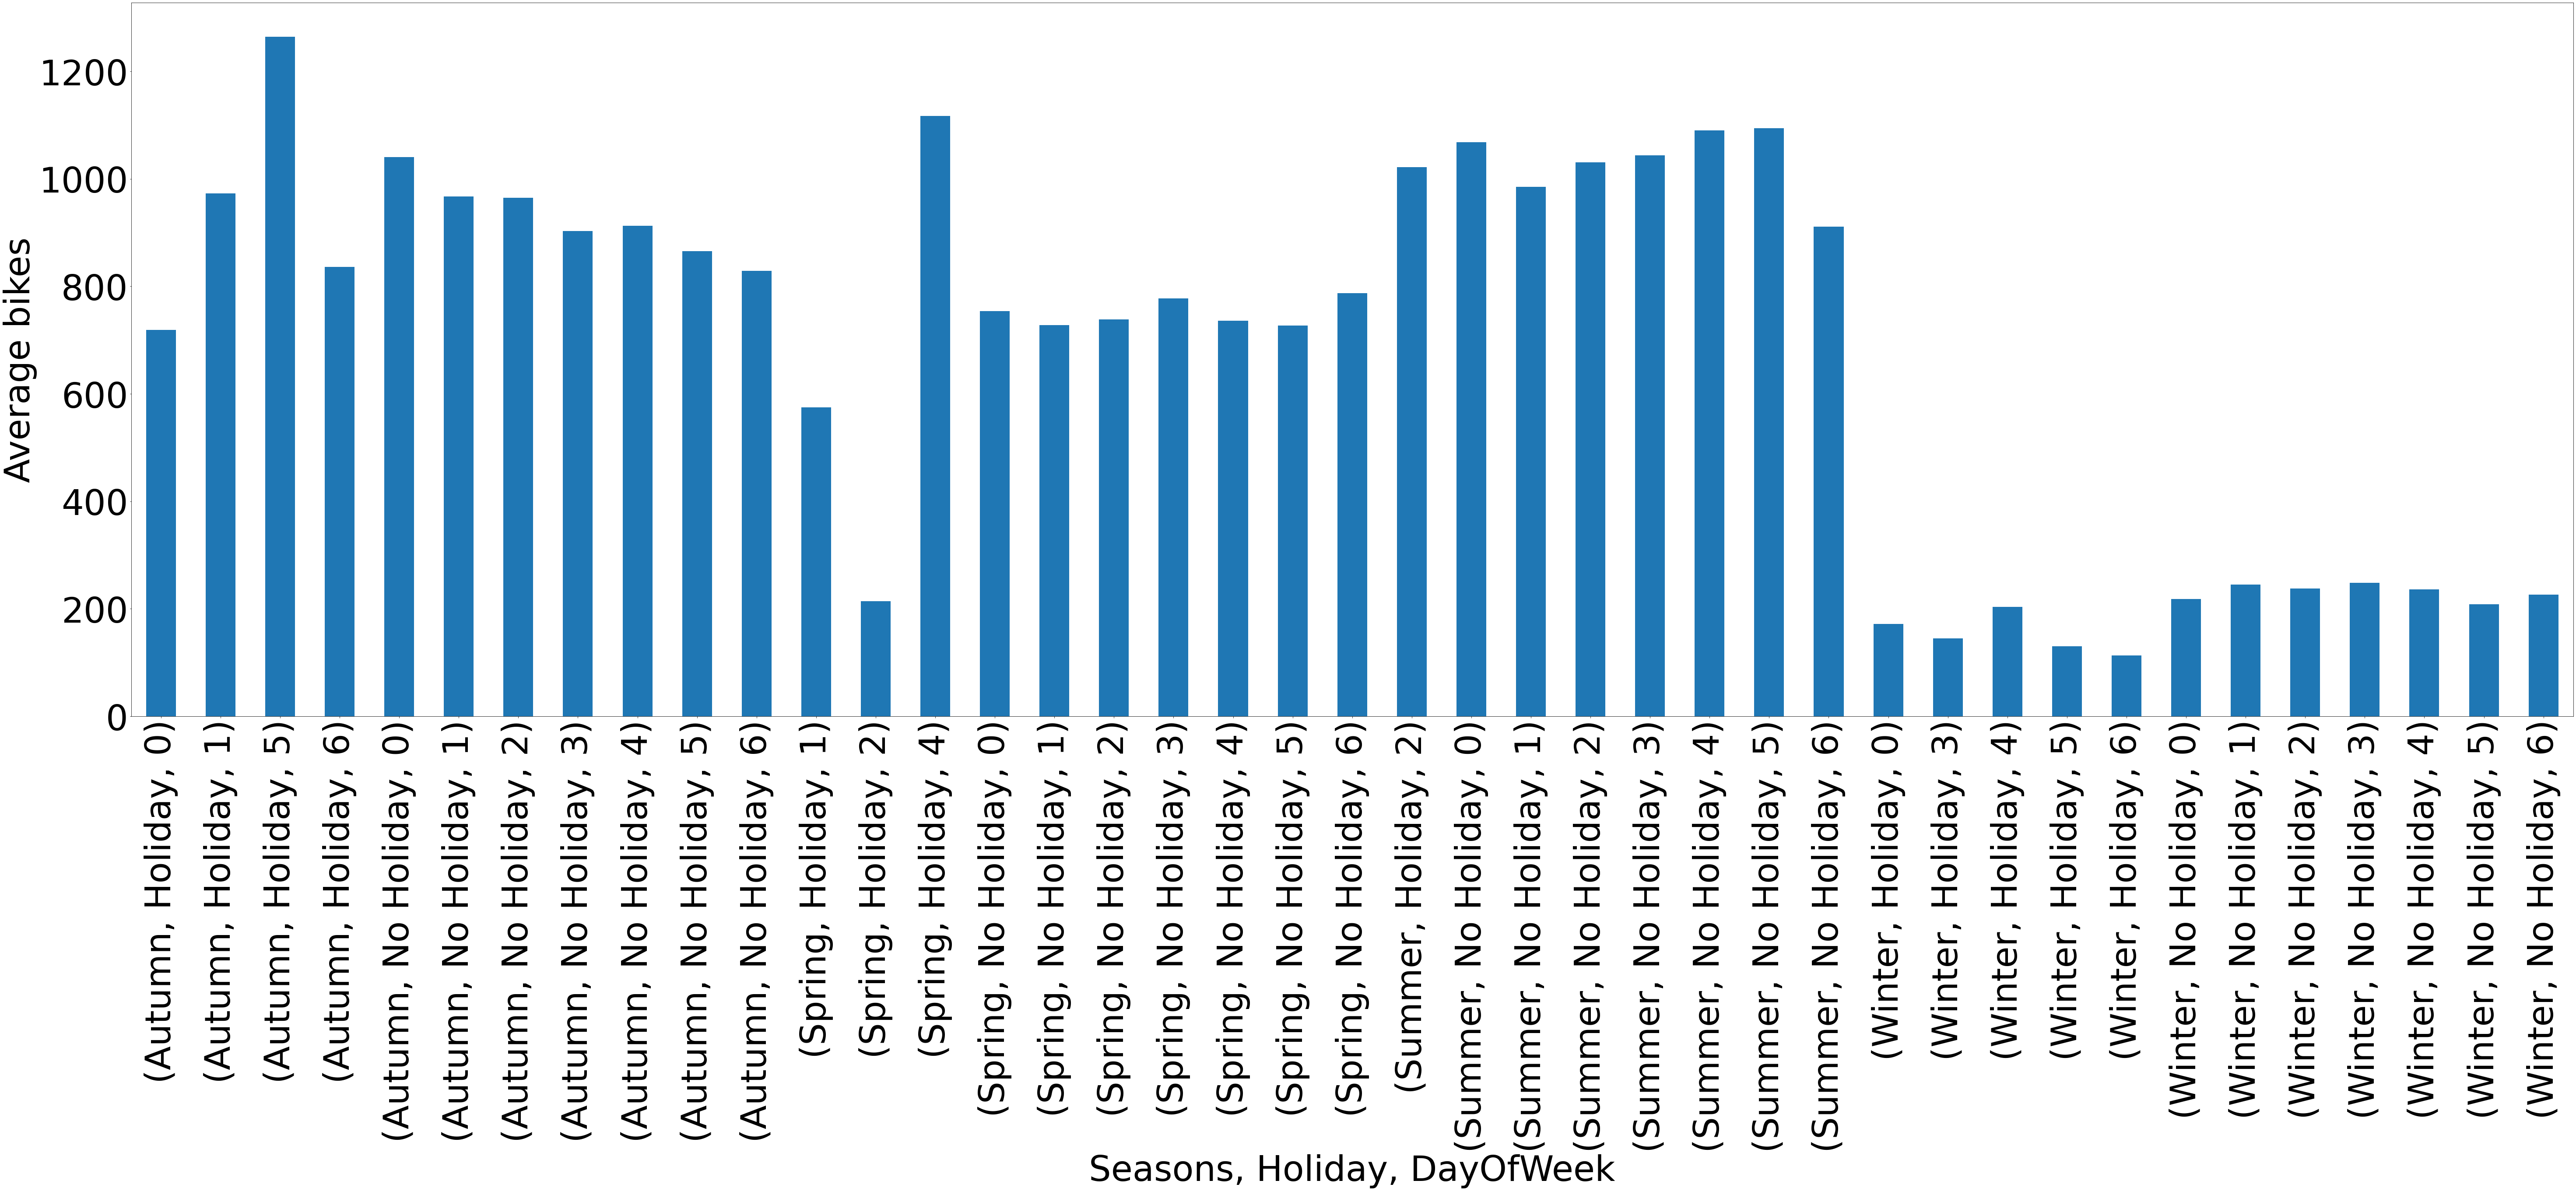

In [ ]:
ax = df.groupby(['Seasons', 'Holiday', 'DayOfWeek'])['Rented Bike Count'].mean().plot(kind = "bar",figsize=(100,30), fontsize=50)
ax.set_xlabel('Seasons, Holiday, DayOfWeek', size = 80)
ax.set_ylabel('Average bikes', size = 80)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(80) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(80) 

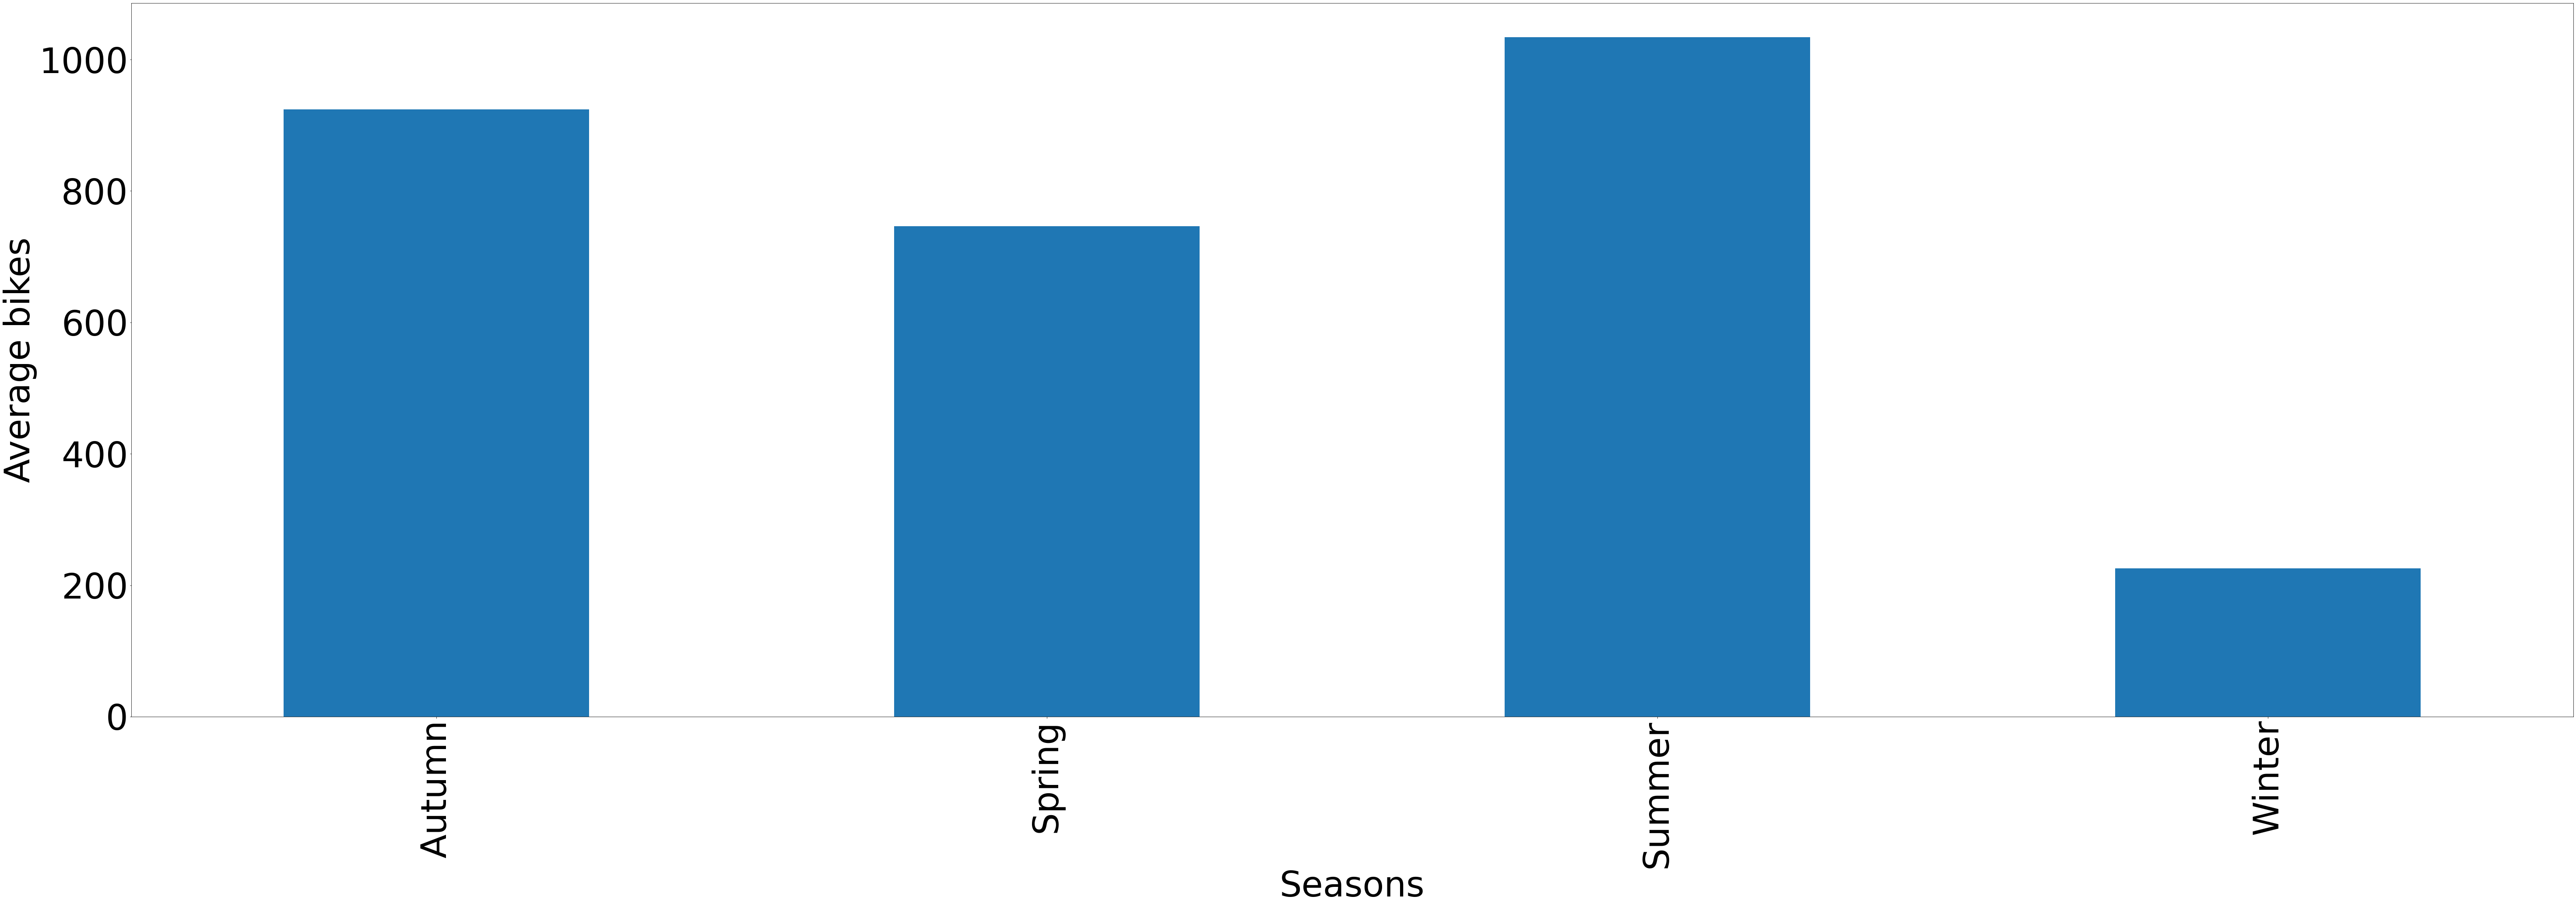

In [ ]:
ax = df.groupby(['Seasons'])['Rented Bike Count'].mean().plot(kind = "bar",figsize=(100,30), fontsize=50)
ax.set_xlabel('Seasons', size = 80)
ax.set_ylabel('Average bikes', size = 80)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(80) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(80) 

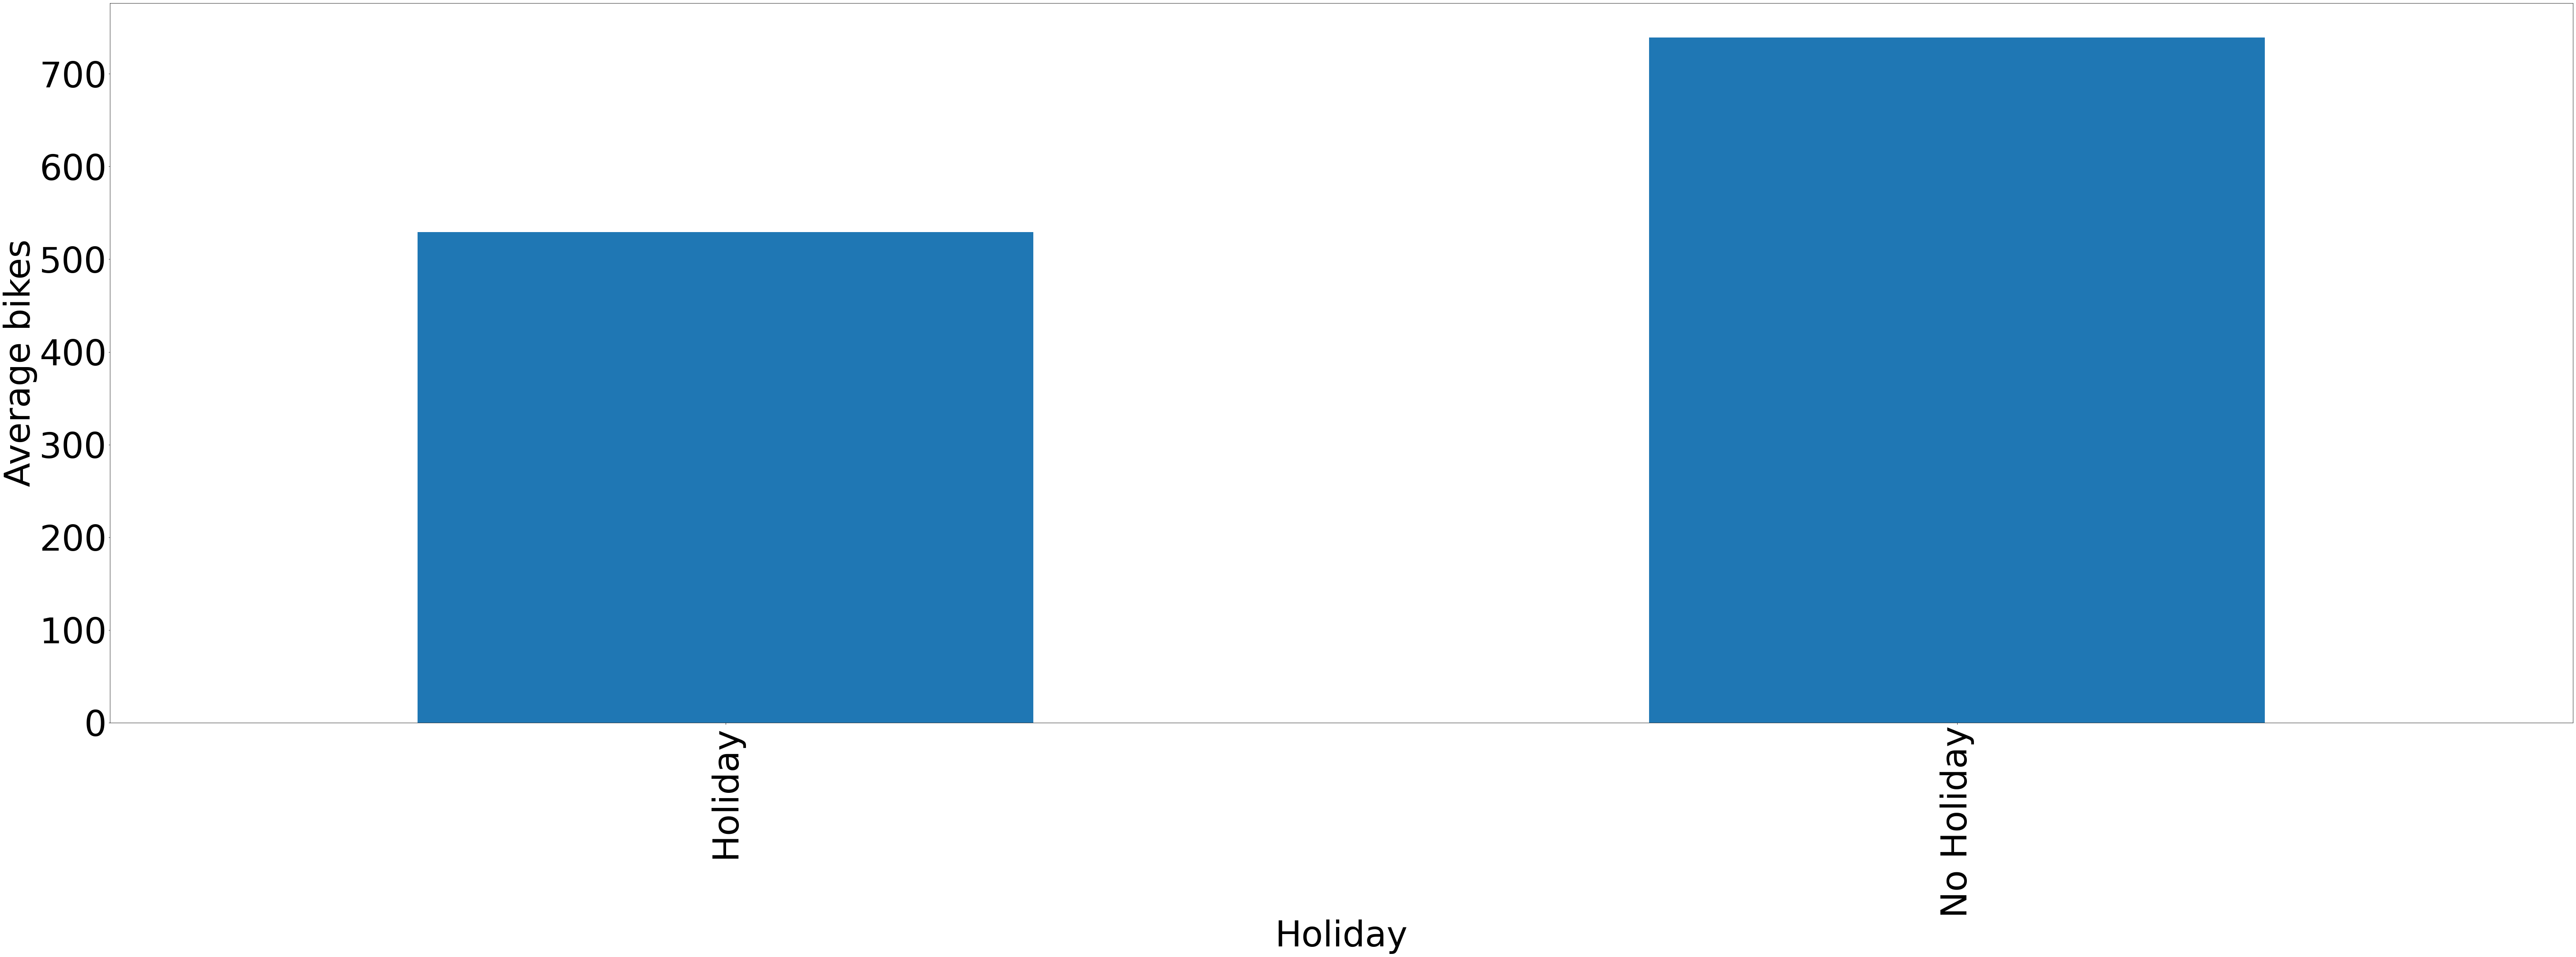

In [ ]:
ax = df.groupby([ 'Holiday'])['Rented Bike Count'].mean().plot(kind = "bar",figsize=(100,30), fontsize=50)
ax.set_xlabel('Holiday', size = 80)
ax.set_ylabel('Average bikes', size = 80)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(80) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(80) 

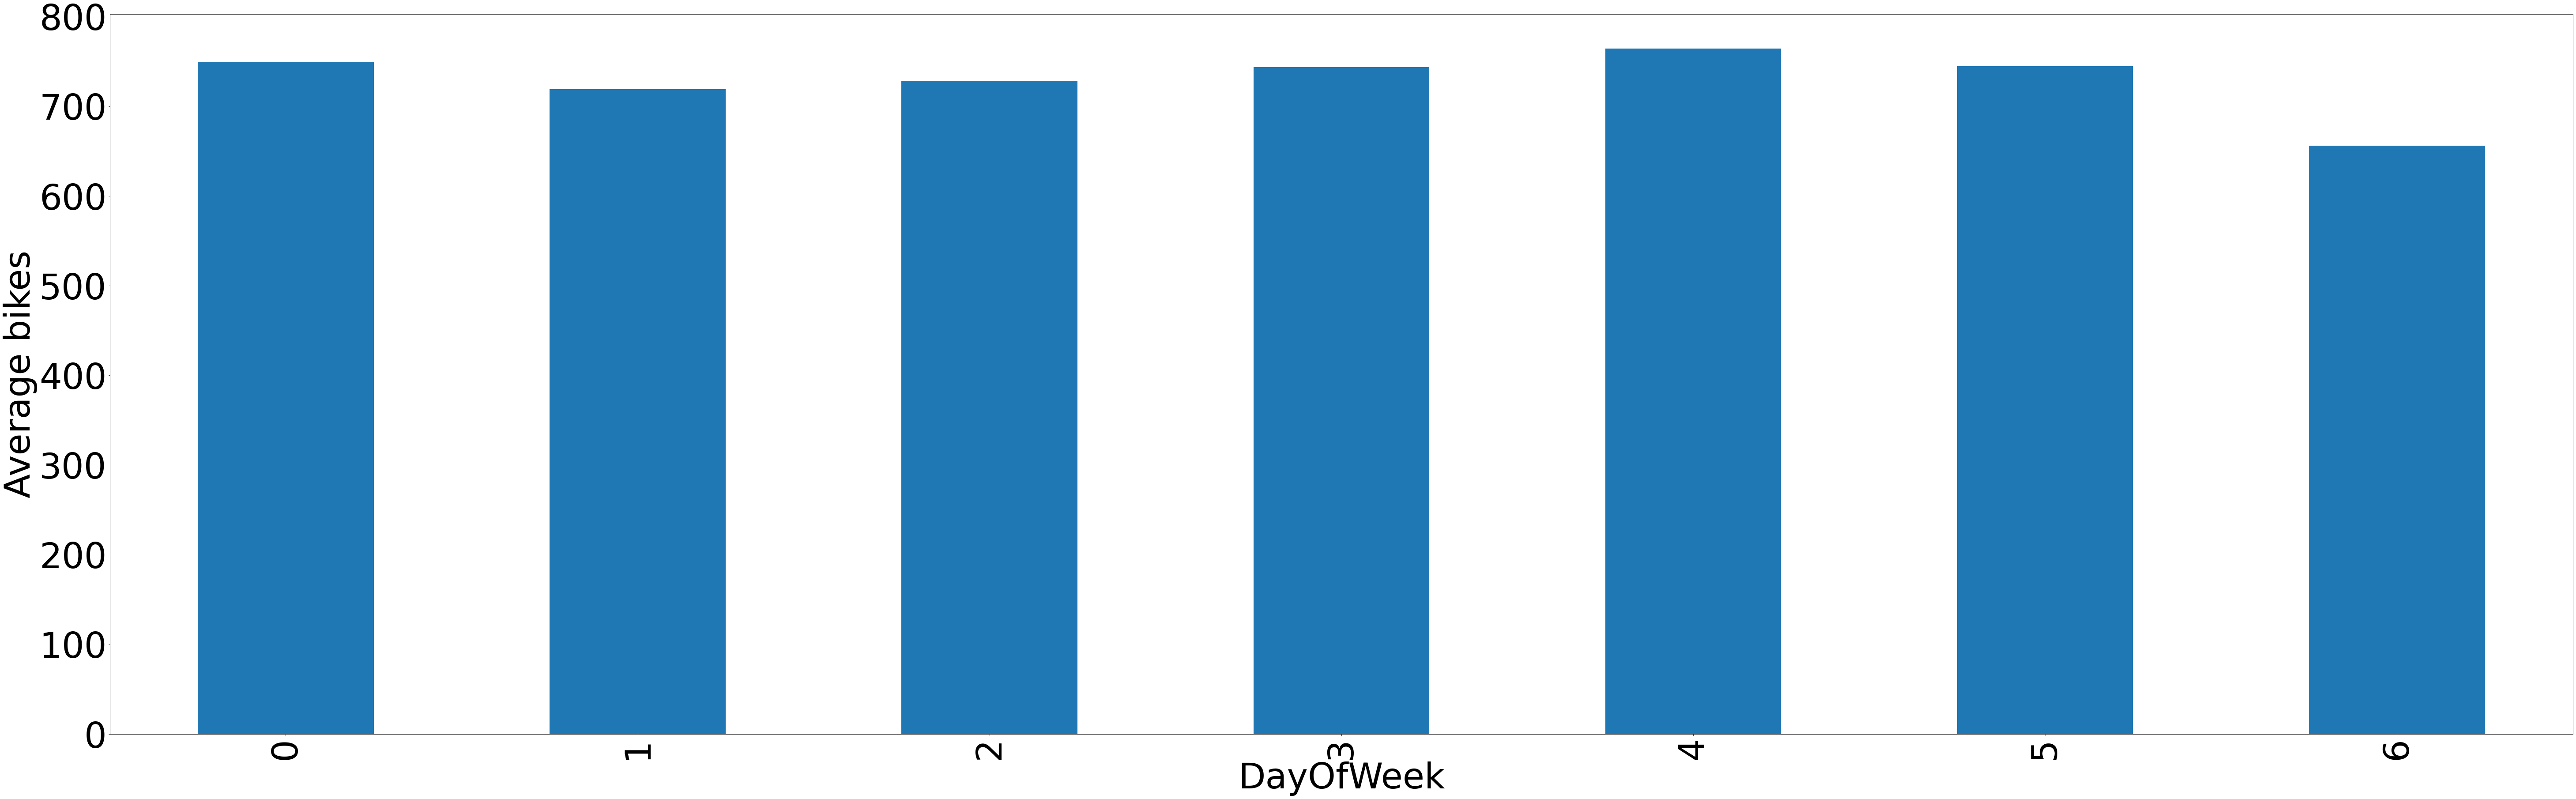

In [ ]:
ax = df.groupby(['DayOfWeek'])['Rented Bike Count'].mean().plot(kind = "bar",figsize=(100,30), fontsize=50)
ax.set_xlabel('DayOfWeek', size = 80)
ax.set_ylabel('Average bikes', size = 80)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(80) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(80) 

### Data Preparation
#### Split Data (X and y)

In [3]:
#Split into X and y
X = df.iloc[:,0:-1].values #All except the last column
y = df.iloc[:,-1].values #Only the last column
print(X[564:569])
print(X[2550:2555])
print(X[5000:5005])

[[12 4.1 91 0.8 404 2.7 0.07 9.5 0.0 'Winter' 'Holiday' 6]
 [13 3.7 90 0.7 744 2.2 0.15 0.0 0.0 'Winter' 'Holiday' 6]
 [14 3.3 90 2.5 561 1.8 0.19 0.0 0.0 'Winter' 'Holiday' 6]
 [15 2.9 90 2.0 380 1.4 0.08 3.5 0.0 'Winter' 'Holiday' 6]
 [16 2.3 91 3.3 270 0.9 0.07 0.0 0.0 'Winter' 'Holiday' 6]]
[[6 0.8 63 1.0 2000 -5.4 0.0 0.0 0.0 'Spring' 'No Holiday' 5]
 [7 0.5 64 0.8 2000 -5.5 0.01 0.0 0.0 'Spring' 'No Holiday' 5]
 [8 1.3 57 1.0 1974 -6.2 0.32 0.0 0.0 'Spring' 'No Holiday' 5]
 [9 3.4 49 1.6 1950 -6.3 1.03 0.0 0.0 'Spring' 'No Holiday' 5]
 [10 6.0 43 1.0 1829 -5.6 1.69 0.0 0.0 'Spring' 'No Holiday' 5]]
[[8 22.2 95 1.6 389 21.3 0.26 0.0 0.0 'Summer' 'No Holiday' 4]
 [9 22.9 86 1.7 538 20.4 0.76 0.0 0.0 'Summer' 'No Holiday' 4]
 [10 24.4 76 2.1 617 19.8 1.58 0.0 0.0 'Summer' 'No Holiday' 4]
 [11 24.8 74 1.8 644 19.8 1.41 0.0 0.0 'Summer' 'No Holiday' 4]
 [12 26.1 67 2.2 758 19.4 2.15 0.0 0.0 'Summer' 'No Holiday' 4]]


#### OneHot Encoding

In [4]:
#Deal with categorical variables
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

col_trans = make_column_transformer((OneHotEncoder(), [9,10]), remainder='passthrough')
X = col_trans.fit_transform(X)
#onehot encoding moves encoded features to front of columns
print(X[564:569])
print(X[2550:2555])
print(X[5000:5005])
print(X.shape)

[[0.0 0.0 0.0 1.0 1.0 0.0 12 4.1 91 0.8 404 2.7 0.07 9.5 0.0 6]
 [0.0 0.0 0.0 1.0 1.0 0.0 13 3.7 90 0.7 744 2.2 0.15 0.0 0.0 6]
 [0.0 0.0 0.0 1.0 1.0 0.0 14 3.3 90 2.5 561 1.8 0.19 0.0 0.0 6]
 [0.0 0.0 0.0 1.0 1.0 0.0 15 2.9 90 2.0 380 1.4 0.08 3.5 0.0 6]
 [0.0 0.0 0.0 1.0 1.0 0.0 16 2.3 91 3.3 270 0.9 0.07 0.0 0.0 6]]
[[0.0 1.0 0.0 0.0 0.0 1.0 6 0.8 63 1.0 2000 -5.4 0.0 0.0 0.0 5]
 [0.0 1.0 0.0 0.0 0.0 1.0 7 0.5 64 0.8 2000 -5.5 0.01 0.0 0.0 5]
 [0.0 1.0 0.0 0.0 0.0 1.0 8 1.3 57 1.0 1974 -6.2 0.32 0.0 0.0 5]
 [0.0 1.0 0.0 0.0 0.0 1.0 9 3.4 49 1.6 1950 -6.3 1.03 0.0 0.0 5]
 [0.0 1.0 0.0 0.0 0.0 1.0 10 6.0 43 1.0 1829 -5.6 1.69 0.0 0.0 5]]
[[0.0 0.0 1.0 0.0 0.0 1.0 8 22.2 95 1.6 389 21.3 0.26 0.0 0.0 4]
 [0.0 0.0 1.0 0.0 0.0 1.0 9 22.9 86 1.7 538 20.4 0.76 0.0 0.0 4]
 [0.0 0.0 1.0 0.0 0.0 1.0 10 24.4 76 2.1 617 19.8 1.58 0.0 0.0 4]
 [0.0 0.0 1.0 0.0 0.0 1.0 11 24.8 74 1.8 644 19.8 1.41 0.0 0.0 4]
 [0.0 0.0 1.0 0.0 0.0 1.0 12 26.1 67 2.2 758 19.4 2.15 0.0 0.0 4]]
(8465, 16)


In [5]:
#drop excess column for each encoded feature
X=X[:,[1,2,3,5,6,7,8,9,10,11,12,13,14,15]]

print(X[564:569])
print(X[2550:2555])
print(X[5000:5005])
print(X.shape)

[[0.0 0.0 1.0 0.0 12 4.1 91 0.8 404 2.7 0.07 9.5 0.0 6]
 [0.0 0.0 1.0 0.0 13 3.7 90 0.7 744 2.2 0.15 0.0 0.0 6]
 [0.0 0.0 1.0 0.0 14 3.3 90 2.5 561 1.8 0.19 0.0 0.0 6]
 [0.0 0.0 1.0 0.0 15 2.9 90 2.0 380 1.4 0.08 3.5 0.0 6]
 [0.0 0.0 1.0 0.0 16 2.3 91 3.3 270 0.9 0.07 0.0 0.0 6]]
[[1.0 0.0 0.0 1.0 6 0.8 63 1.0 2000 -5.4 0.0 0.0 0.0 5]
 [1.0 0.0 0.0 1.0 7 0.5 64 0.8 2000 -5.5 0.01 0.0 0.0 5]
 [1.0 0.0 0.0 1.0 8 1.3 57 1.0 1974 -6.2 0.32 0.0 0.0 5]
 [1.0 0.0 0.0 1.0 9 3.4 49 1.6 1950 -6.3 1.03 0.0 0.0 5]
 [1.0 0.0 0.0 1.0 10 6.0 43 1.0 1829 -5.6 1.69 0.0 0.0 5]]
[[0.0 1.0 0.0 1.0 8 22.2 95 1.6 389 21.3 0.26 0.0 0.0 4]
 [0.0 1.0 0.0 1.0 9 22.9 86 1.7 538 20.4 0.76 0.0 0.0 4]
 [0.0 1.0 0.0 1.0 10 24.4 76 2.1 617 19.8 1.58 0.0 0.0 4]
 [0.0 1.0 0.0 1.0 11 24.8 74 1.8 644 19.8 1.41 0.0 0.0 4]
 [0.0 1.0 0.0 1.0 12 26.1 67 2.2 758 19.4 2.15 0.0 0.0 4]]
(8465, 14)


#### Normalization

In [6]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X[564:569])
print(X[2550:2555])
print(X[5000:5005])

[[-0.58530782 -0.59404105  1.7085027  -4.44382144  0.07123354 -0.71639962
   1.60385673 -0.89524758 -1.6910471  -0.09402153 -0.57345217  8.3083965
  -0.17495069  1.49928184]
 [-0.58530782 -0.59404105  1.7085027  -4.44382144  0.21573197 -0.74944748
   1.55503726 -0.9919388  -1.1327688  -0.13178127 -0.48130686 -0.13249526
  -0.17495069  1.49928184]
 [-0.58530782 -0.59404105  1.7085027  -4.44382144  0.3602304  -0.78249533
   1.55503726  0.7485031  -1.43325389 -0.16198906 -0.4352342  -0.13249526
  -0.17495069  1.49928184]
 [-0.58530782 -0.59404105  1.7085027  -4.44382144  0.50472883 -0.81554319
   1.55503726  0.26504702 -1.73045498 -0.19219685 -0.56193401  2.97730697
  -0.17495069  1.49928184]
 [-0.58530782 -0.59404105  1.7085027  -4.44382144  0.64922726 -0.86511497
   1.60385673  1.52203283 -1.91107443 -0.22995659 -0.57345217 -0.13249526
  -0.17495069  1.49928184]]
[[ 1.7085027  -0.59404105 -0.58530782  0.22503154 -0.79575704 -0.98904443
   0.23691143 -0.70186515  0.92957692 -0.70572931 -

#### Test/Train Split

In [7]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#X field positions:
#Spring, Summer, Winter, Holiday=False,'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'

(5925, 14)
(5925,)
(2540, 14)
(2540,)


### Models

#### Linear Regression

In [ ]:
#Fitting Linear Regression to Training Set
from sklearn.linear_model import LinearRegression
import numpy as np
lrObj = LinearRegression()
lrObj.fit(X_train, y_train)

#Prediction on the Test Set
y_pred = lrObj.predict(X_test)

#accuracy (R squared)
print('The linear model accuracy is: ' + str(lrObj.score(X_test,y_test)))

# mean squared error/Root Mean Square Error
from sklearn.metrics import mean_squared_error
mse=round((mean_squared_error(y_test, y_pred))/100, 4)
rmse = round((np.sqrt(mse))/100 ,4)

print("MSE:", mse)
print("RMSE:",rmse)

#K-Fold Cross Validation
print('Cross Validation')
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lrObj, X=X_train, y=y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies.mean())
print('Model Accuracy StDev:',modelAccuracies.std())

The linear model accuracy is: 0.5369674634407413
MSE: 1874.214
RMSE: 0.4329
Cross Validation
Model Accuracy Mean: 0.5398046502372322
Model Accuracy StDev: 0.027462818358036926


#### Polynomial (Degrees = 2)

In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

polyFeatureObj = PolynomialFeatures(degree=2)
X_poly = polyFeatureObj.fit_transform(X)

poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 4)

lrObjAfterPoly = linear_model.LinearRegression()

model = lrObjAfterPoly.fit(poly_X_train, poly_y_train)

#Prediction on the Test Set
poly_y_pred = lrObjAfterPoly.predict(poly_X_test)

score = model.score(poly_X_test, poly_y_test)

#accuracy (R squared)
print('The linear model accuracy after Polynomial (degree=2) is: ' + str(score))

# mean squared error/Root Mean Square Error
from sklearn.metrics import mean_squared_error
mse=round((mean_squared_error(poly_y_test, poly_y_pred))/100, 4)
rmse = round((np.sqrt(mse))/100 ,4)

print("MSE:", mse)
print("RMSE:",rmse)

#K-Fold Cross Validation
print('Cross Validation')
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lrObjAfterPoly, X=poly_X_train, y=poly_y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies.mean())
print('Model Accuracy StDev:',modelAccuracies.std())

The linear model accuracy after Polynomial (degree=2) is: 0.6811309723814191
MSE: 1367.0846
RMSE: 0.3697
Cross Validation
Model Accuracy Mean: 0.6963495886017452
Model Accuracy StDev: 0.022473628143423102


#### Tree Forest


Cross Validation with Random Forest Estimators set to 710:
Model Accuracy Mean: 0.8882294341910036
Model Accuracy StDev: 0.013673485944162737


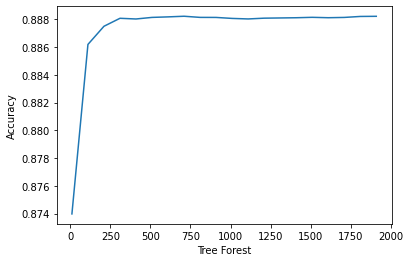

In [ ]:
# Tree Forest Regression
X_Results = np.empty((0), int)
Y_Results = np.empty((0), float)
for i in range(10,2000,100):
    #Create and Fit a Regressor Object
    from sklearn.ensemble import RandomForestRegressor
    regObj = RandomForestRegressor(n_estimators=i, random_state=0)
    regObj.fit(X_train,y_train)
    reg_pred_y = regObj.predict(X_test)
    
    # mean squared error/Root Mean Square Error
    #from sklearn.metrics import mean_squared_error
    #mse=round((mean_squared_error(y_test, reg_pred_y))/100, 4)
    #rmse = round((np.sqrt(mse))/100 ,4)

    #K-Fold Cross Validation
    #print('\nCross Validation:')
    from sklearn.model_selection import cross_val_score
    modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
    
    X_Results = np.append(X_Results, [i], axis = 0)
    Y_Results = np.append(Y_Results, [modelAccuracies.mean()], axis = 0)
    
    #print('Model Accuracy Mean:',modelAccuracies.mean())
    #print('Model Accuracy StDev:',modelAccuracies.std())
    #print()
    
plt.xlabel('Tree Forest')
plt.ylabel('Accuracy')
plt.plot(X_Results, Y_Results)
maxY = max(Y_Results)
y_index = np.where(Y_Results == maxY)

#Keep the best result for use later
regObj = RandomForestRegressor(n_estimators=X_Results[y_index][0], random_state=0)
regObj.fit(X_train,y_train)
reg_pred_y = regObj.predict(X_test)

#Making predictions on the Test Set
y_pred = regObj.predict(X_test)

#K-Fold Cross Validation
print('\nCross Validation with Random Forest Estimators set to ' + str(X_Results[y_index][0]) + ':')
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies.mean())
print('Model Accuracy StDev:',modelAccuracies.std())

# While the max value is with 710 estimators, after approximately 300, the increase in accuracy is not significant
# fewer estimators will perform faster with little loss of accuracy and will have less chance of being overfit
# Anther run between 305 and 315 stepping by 1 will provide the ideal value for n_estimators


In [ ]:
print(Y_Results)

[0.88788723 0.88787034 0.88788297 0.88791608 0.88791793 0.88789045
 0.88789357 0.8878849  0.88788441 0.88790034 0.8879229  0.88791872
 0.8879035  0.88791054 0.88794492 0.8879624  0.88799254 0.88800298
 0.88801316 0.88805457 0.88808184]



Cross Validation with Random Forest Estimators set to 312:
Model Accuracy Mean: 0.8880926646646182
Model Accuracy StDev: 0.013712359588720899


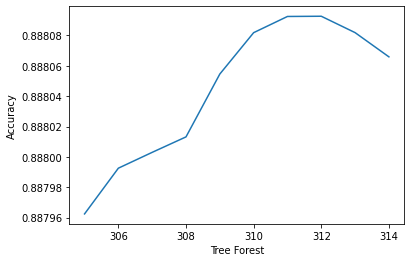

In [ ]:
# Tree Forest Regression
X_Results = np.empty((0), int)
Y_Results = np.empty((0), float)
for i in range(305,315,1):
    #Create and Fit a Regressor Object
    from sklearn.ensemble import RandomForestRegressor
    regObj = RandomForestRegressor(n_estimators=i, random_state=0)
    regObj.fit(X_train,y_train)
    reg_pred_y = regObj.predict(X_test)
    
    # mean squared error/Root Mean Square Error
    #from sklearn.metrics import mean_squared_error
    #mse=round((mean_squared_error(y_test, reg_pred_y))/100, 4)
    #rmse = round((np.sqrt(mse))/100 ,4)

    #K-Fold Cross Validation
    #print('\nCross Validation:')
    from sklearn.model_selection import cross_val_score
    modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
    
    X_Results = np.append(X_Results, [i], axis = 0)
    Y_Results = np.append(Y_Results, [modelAccuracies.mean()], axis = 0)
    
    #print('Model Accuracy Mean:',modelAccuracies.mean())
    #print('Model Accuracy StDev:',modelAccuracies.std())
    #print()
    
plt.xlabel('Tree Forest')
plt.ylabel('Accuracy')
plt.plot(X_Results, Y_Results)
maxY = max(Y_Results)
y_index = np.where(Y_Results == maxY)

#Keep the best result for use later
regObj = RandomForestRegressor(n_estimators=X_Results[y_index][0], random_state=0)
regObj.fit(X_train,y_train)
reg_pred_y = regObj.predict(X_test)

#Making predictions on the Test Set
y_pred = regObj.predict(X_test)

#K-Fold Cross Validation
print('\nCross Validation with Random Forest Estimators set to ' + str(X_Results[y_index][0]) + ':')
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('Model Accuracy Mean:',modelAccuracies.mean())
print('Model Accuracy StDev:',modelAccuracies.std())

# While the max value is with 312 estimators, 311 and 312 were nearly identical so we chose 311

In [ ]:
print(Y_Results)

[0.8879624  0.88799254 0.88800298 0.88801316 0.88805457 0.88808184
 0.88809252 0.88809266 0.88808187 0.88806591]


In [ ]:
# Tree Forest Regression
#Keep the best result for use later
from datetime import datetime as dt, timedelta as td
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
nest = 311

regObj = RandomForestRegressor(n_estimators=nest, random_state=0)
regObj.fit(X_train,y_train)
reg_pred_y = regObj.predict(X_test)
score_tf = regObj.score(X_test,y_test)

#K-Fold Cross Validation
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)

# mean squared error/Root Mean Square Error
mse_tf=round((mean_squared_error(y_test, reg_pred_y))/100, 4)
rmse_tf = round((np.sqrt(mse_tf))/100 ,4)

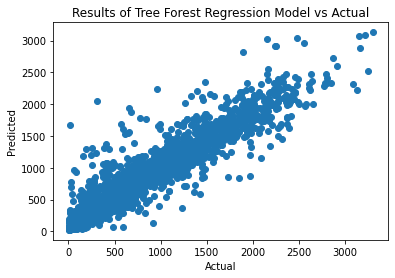

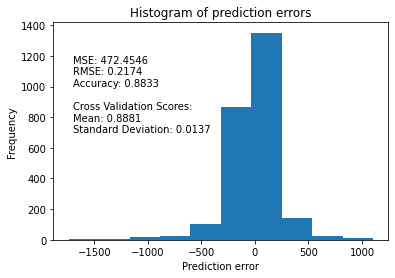

In [ ]:
#Visualizing after Tree Forest Regression
import matplotlib.pyplot as plt

#compare results vs actual
fig, ax = plt.subplots()
ax.scatter(y_test, reg_pred_y)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Results of Tree Forest Regression Model vs Actual')
plt.show()

plt.hist(y_test - reg_pred_y)
plt.annotate('MSE: ' + str(round(mse_tf,4)) + 
             '\nRMSE: ' +str(round(rmse_tf,4)) + 
             '\nAccuracy: ' + str(round(score_tf,4)) + '\n\nCross Validation Scores:' + 
             '\nMean: '+ str(round(modelAccuracies.mean(),4)) + 
             '\nStandard Deviation: ' + str(round(modelAccuracies.std(),4)), (-1700,700))
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()

#### KNN Regressor

The linear model accuracy after kNN is: 0.75195453821425
MSE: 1004.0121
RMSE: 0.3169

Cross Validation with kNN set to 4:
Model Accuracy Mean: 0.7622241254722171
Model Accuracy StDev: 0.020320443208732542


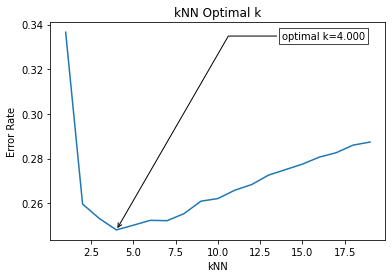

In [14]:
#KNN - Regression

def annot_min(x,y, ax=None):
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text= "optimal k={:.3f}".format(xmin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.94,0.96), **kw)
    
from sklearn.neighbors import KNeighborsRegressor

X_Results = np.empty((0), int)
Y_Results = np.empty((0), float)
for i in range(1,20, 1):
    KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=i, p=2, metric='minkowski')
    KNeighborsRegressorObj.fit(X_train, y_train)
    
    #Making predictions on the Test Set
    knn_pred_y = KNeighborsRegressorObj.predict(X_test)

    X_Results = np.append(X_Results, [i], axis = 0)
    Y_Results = np.append(Y_Results, [1-KNeighborsRegressorObj.score(X_test,y_test)], axis = 0)

minY = min(Y_Results)
y_index = np.where(Y_Results == minY)

#Keep the best result for use later
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=X_Results[y_index][0], p=2, metric='minkowski')
KNeighborsRegressorObj.fit(X_train, y_train)

#Making predictions on the Test Set
knn_pred_y = KNeighborsRegressorObj.predict(X_test)

knn_score = KNeighborsRegressorObj.score(X_test,y_test)

#accuracy 
print('The linear model accuracy after kNN is: ' + str(knn_score))

# mean squared error/Root Mean Square Error
from sklearn.metrics import mean_squared_error
knn_mse=round((mean_squared_error(y_test, knn_pred_y))/100, 4)
knn_rmse = round((np.sqrt(knn_mse))/100 ,4)

print("MSE:", knn_mse)
print("RMSE:",knn_rmse)

#K-Fold Cross Validation
print('\nCross Validation with kNN set to ' + str(X_Results[y_index][0]) + ':')
from sklearn.model_selection import cross_val_score
knn_modelAccuracies = cross_val_score(estimator=KNeighborsRegressorObj, X=X_train, y=y_train, cv=10)
print('Model Accuracy Mean:',knn_modelAccuracies.mean())
print('Model Accuracy StDev:',knn_modelAccuracies.std())

#show optimal k
fig, ax = plt.subplots()
ax.plot(X_Results, Y_Results)
ax.set_xlabel('kNN')
ax.set_ylabel('Error Rate')
plt.title('kNN Optimal k')
minY = min(Y_Results)
y_index = np.where(Y_Results == minY)
annot_min(X_Results, Y_Results)
plt.show()


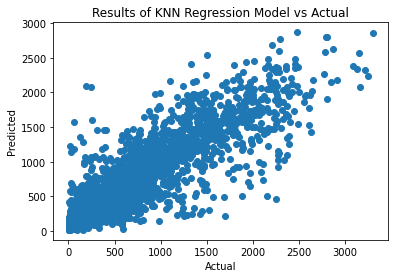

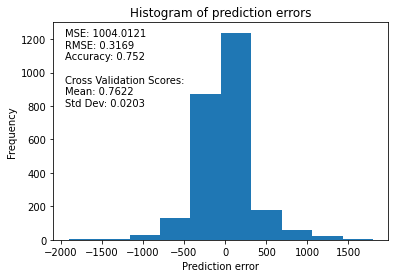

In [ ]:
#Visualizing after Tree Forest Regression
import matplotlib.pyplot as plt



#compare results vs actual
fig, ax = plt.subplots()
ax.scatter(y_test, knn_pred_y)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Results of KNN Regression Model vs Actual')
plt.show()

plt.hist(y_test - knn_pred_y)
plt.annotate('MSE: ' + str(round(knn_mse,4)) + 
             '\nRMSE: ' +str(round(knn_rmse,4)) + 
             '\nAccuracy: ' + str(round(knn_score,4)) + '\n\nCross Validation Scores:' + 
             '\nMean: '+ str(round(knn_modelAccuracies.mean(),4)) + 
             '\nStd Dev: ' + str(round(knn_modelAccuracies.std(),4)), (-1950,800))
plt.title('Histogram of prediction errors')
plt.xlabel('Prediction error')
plt.ylabel('Frequency')
plt.show()